In [38]:
import pandas as pd
import numpy as np
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [39]:
# Получение данных
try:
    df = pd.read_csv("student_part_time_job_impact.csv")
except FileNotFoundError:
    print(f"Error. File not found")

# Удаление столбцов
df = df.drop(["Student_ID", "Date"], axis=1, errors="ignore")
df.head()

,Work_Hours,Job_Type,Sleep_Hours,Study_Hours,Work_Life_Balance,Stress_Level,Academic_Performance,Social_Activity,Job_Satisfaction
0,28,Retail Assistant,5,25,9,2,3.30,14,6
1,40,Research Assistant,9,21,7,7,2.88,5,9
2,18,Retail Assistant,6,23,7,4,3.44,5,9
3,11,Tutor,9,12,6,2,3.26,6,10
4,13,Freelancer,6,9,3,6,2.30,6,2


In [40]:
# Преобразование типа работы в числовые значения
le = LabelEncoder()
df['Job_Type']=le.fit_transform(df['Job_Type'])
dump(le, "label_encoder.joblib")

['label_encoder.joblib']

In [41]:
# Проверка на пустые поля
columns_with_missing_values = [col for col in df.columns if df[col].isnull().any()]
if len(columns_with_missing_values)==0:
    print("Пустых полей нет")
else:
    print("Есть пустые поля")

Пустых полей нет


In [42]:
# Разделение на признаки и целевую переменную
X = df.drop("Work_Life_Balance", axis=1)
y = df["Work_Life_Balance"]
"""
?
X - набор данных, который будет использоваться для прогнозирования
y - то, что мы хотим предсказать с помощью модели машинного обучения
"""

# Масштабирование данных
scaler = StandardScaler()
X = scaler.fit_transform(X)
dump(scaler, "scaler.joblib")
"""
?
Предотвращение доминирования признаков с большим диапазоном: 
Если один признак имеет диапазон значений от 0 до 1000, 
а другой - от 0 до 1, то первый признак может доминировать над вторым при обучении модели,
даже если второй признак на самом деле более важен для прогнозирования.
Масштабирование приводит все признаки к одному масштабу, предотвращая такое доминирование.
"""

# Обучащющая и тестовая выборка
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
"""
?
Разделение данных на тестовые и обучаемые.
0.2 - 20% данных на тестирование, остальное - для обучения
42 - число для рандомайзера, который будет случайно выбирать данные и делить их на эти две категории.
Нужно оно для того, чтобы при каждом запуске данные были одни и те же.
"""

'\n?\nРазделение данных на тестовые и обучаемые.\n0.2 - 20% данных на тестирование, остальное - для обучения\n42 - число для рандомайзера, который будет случайно выбирать данные и делить их на эти две категории.\nНужно оно для того, чтобы при каждом запуске данные были одни и те же.\n'

In [43]:
# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
"""
?
Создает деревья, на которых будет происходить обучение. Они будут рандомно заполяться данными.
Прогнозирование как раз происходит по каждому из деревьев, а итог - среднее из всех предсказаний.
n_estimators=100 - количество деревьев
"""

model.fit(X_train, y_train)
"""
?
Происходит обучение и распределение данных по деревьям.
Находит оптимальные параметры для этого, чтобы не было ошибок в предсказании.
"""

# Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
"""
?
y_pred - тестирование модели, создание прогноза по данным X_test
mse - смотрит среднее квадратичное, насколько отклоняются результаты от истинных.
R2 - это мера того, насколько хорошо модель объясняет вариацию целевой переменной. 
R2 принимает значения от 0 до 1. Значение 1 означает, что модель идеально предсказывает целевую переменную.
Значение 0 означает, что модель не лучше, чем простое предсказание среднего значения целевой переменной.
В некоторых случаях R2 может быть отрицательным, что означает, что модель работает очень плохо.
"""

print(f"Mean Squared Error (MSE): {mse}")
print(f"Отклонение: {np.sqrt(mse)}")
print(f"R-squared (R2): {r2}")

dump(model, 'work_life_balance_model.pkl')

Mean Squared Error (MSE): 9.165989999999999
Отклонение: 3.027538604213
R-squared (R2): -0.11276905707105644


['work_life_balance_model.pkl']

<Axes: >

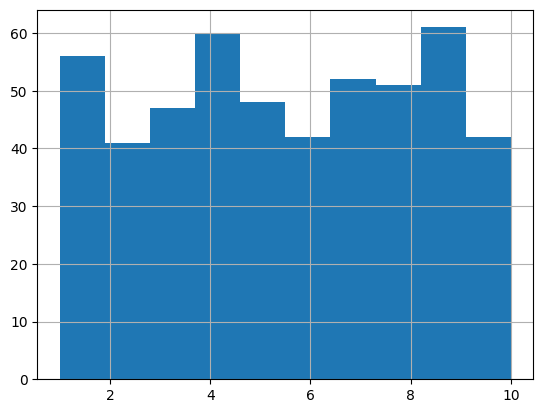

In [44]:
y.hist()